# You should use DeepLearning (tm). Or should you?

How simple models can be preferrable over complex, fancy and state-of-the-art approaches. Inspired by an awesome [talk given by Vincent Warmerdam](https://koaning.io/theme/notebooks/simple-models.pdf).

In [143]:
# VSCode and Jedi still have troubles ...
%config Completer.use_jedi = False

### Importing all the necessary libraries for this notebook

In [162]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import sklearn.model_selection as model_selection

from sklearn.datasets import make_blobs

## Generate the data for the first illustrative problem: XOR

The XOR problem is often taken as exemplary usecase for complex algorithms like neural nets. The idea is simple: you have some data that linear models cannot simply split using a single line.

We'll start by generating an artifical dataset for the XOR problem and then investigate how we can actually solve this using standard logistic regression.

In [164]:
# generate some 4 clusters and then put them into two classes such that a simple linear model can't separate them
inputs, targets = make_blobs(n_samples = 10000, centers = [[1,1], [-1,1], [-1,-1], [1,-1]], n_features = 2, cluster_std = 0.35)
targets[targets == 3] = 1
targets[targets == 2] = 0

# generate proper dataframe
df = pd.DataFrame({'x':inputs[:,0],'y':inputs[:,1],'class':targets})
df

,x,y,class
0,1.108732,1.327191,0
1,-1.441345,0.882689,1
2,0.830925,1.026942,0
3,-0.504140,0.689971,1
4,-0.721348,0.904958,1
...,...,...,...
9995,-0.959086,-0.761466,0
9996,0.809235,1.173485,0
9997,0.793902,1.299638,0
9998,1.123552,0.674324,0


## Plotting the dataset

As usual, it can be very illustrative to investigate the dataset visually. Just to have a look at what we created here.

Text(0, 0.5, 'y')

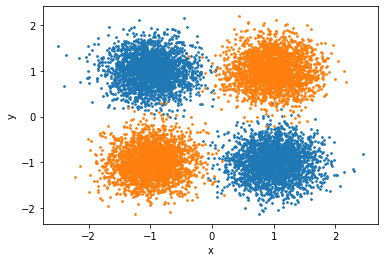

In [260]:
fig, ax = plt.subplots()
ax.margins(0.05)
ax.scatter(df[df['class'] == 1]['x'], df[df['class'] == 1]['y'], label='Class 1', s=3)
ax.scatter(df[df['class'] == 0]['x'], df[df['class'] == 0]['y'], label='Class 0', s=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.legend(numpoints=1, loc='best')

## Generate training and testing data

We'll do the usual split into training and testing data.

In [166]:
X, y = df.iloc[:,0:2], df.iloc[:,2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic Regression is not working

Confirm the usual argument by showing that, indeed, logistic regression does not work to solve this problem.

In [167]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
prediction = log_model.predict(X_test)

The accuracy of the logistic regression is:  0.6896
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.48      0.61      1263
           1       0.63      0.91      0.74      1237

    accuracy                           0.69      2500
   macro avg       0.73      0.69      0.68      2500
weighted avg       0.74      0.69      0.67      2500



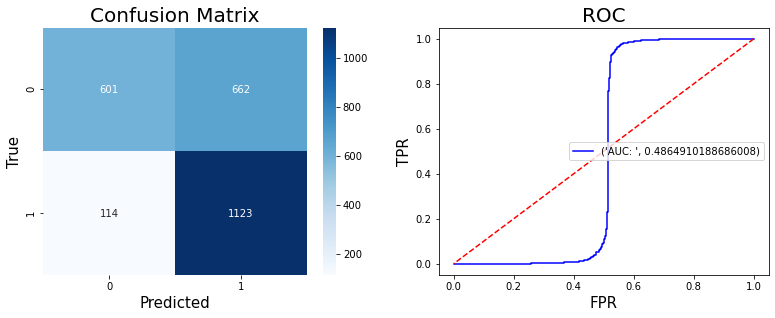

In [168]:
def plot_confusion_matrix(y, prediction):
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y, prediction), annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix', fontsize=20)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('True', fontsize=15)


def plot_roc_curve(model, X, y):
    predicting_probabilities = model.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y,predicting_probabilities)
    plt.subplot(222)
    plt.plot(fpr,tpr, label=('AUC: ',auc(fpr,tpr)), color='b')
    plt.plot([1,0],[1,0], linestyle='dashed', color='r')
    plt.legend(loc='best')
    plt.title('ROC', fontsize=20)
    plt.xlabel('FPR', fontsize=15)
    plt.ylabel('TPR', fontsize=15)

plot_confusion_matrix(y_test,prediction)
plot_roc_curve(log_model, X_test, y_test)

print('The accuracy of the logistic regression is: ', accuracy_score(prediction,y_test))
print('Classification report:\n', classification_report(y_test,prediction))

## SVM performs better

A support vector machine should outperform the logistic regression, is pretty easy to apply, but not as simple to interpret.

The accuracy of the SVM is:  0.992
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1263
           1       0.99      0.99      0.99      1237

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



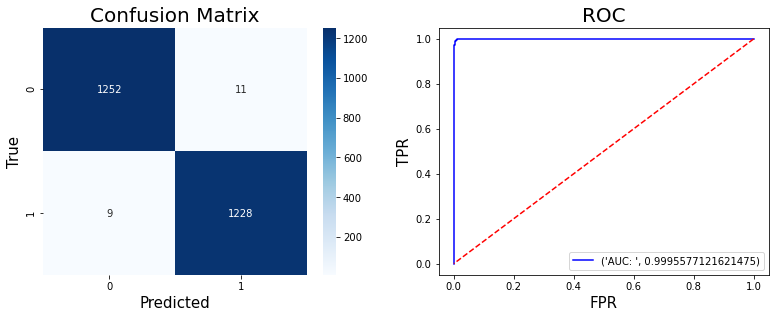

In [170]:
# let's try a SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train,y_train)
prediction = svm_model.predict(X_test)

plot_confusion_matrix(y_test,prediction)
plot_roc_curve(svm_model, X_test, y_test)

print('The accuracy of the SVM is: ', accuracy_score(prediction,y_test))
print('Classification report:\n', classification_report(y_test,prediction))

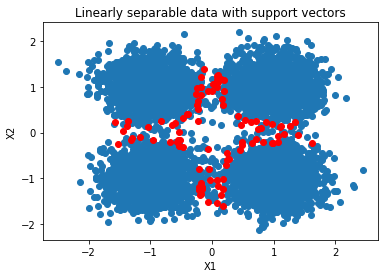

In [171]:
support_vector_indices = clf.support_
support_vectors_per_class = clf.n_support_
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Feature engineering

We can apply some feature engineering that is simple to understand/interpret and helps getting our logistic regression to work.
By using some simple feature engineering we can get our linear model to work, which comes with some obvious advantages:
- more regularisation
- better intrepretability
- easier to put into production, debug and maintain

In [173]:
df['xy'] = df['x'] * df['y']
X, y = df[['x','y','xy']], df[['class']]
X_train_feateng, X_test_feateng, y_train_feateng, y_test_feateng = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

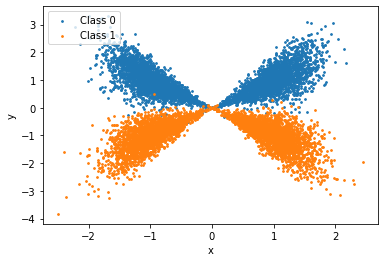

In [272]:
# visualise what we have just done
fig = plt.figure()
ax = fig.add_subplot()
ax.margins(0.05)
ax.scatter(df[df['class'] == 0]['x'], df[df['class'] == 0]['xy'], label='Class 0', s=3)
ax.scatter(df[df['class'] == 1]['x'], df[df['class'] == 1]['xy'], label='Class 1', s=3)
plt.xlabel('x')
plt.ylabel('y')
ax.legend(numpoints=1, loc='upper left')

In [193]:
# try logistic regression again with new feature
log_model = LogisticRegression()
log_model.fit(X_train_feateng,y_train_feateng)
prediction = log_model.predict(X_test_feateng)

/Users/ericschanet/anaconda3/envs/py3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The accuracy of the logistic regression is:  0.9948
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1218
           1       1.00      0.99      0.99      1282

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

[[ 5.61855731e-03  3.21608567e-02 -1.05173343e+01]] [-0.18768756]


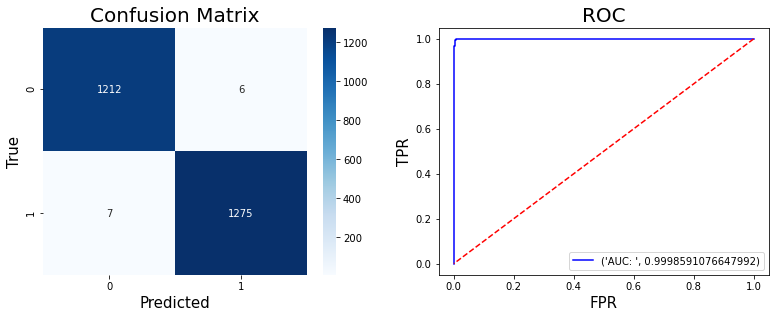

In [202]:
plot_confusion_matrix(y_test_feateng,prediction)
plot_roc_curve(log_model, X_test_feateng, y_test_feateng)

print('The accuracy of the logistic regression is: ', accuracy_score(prediction,y_test_feateng))
print('Classification report:\n', classification_report(y_test_feateng,prediction))

print(log_model.coef_, log_model.intercept_)

In [263]:
xx, yy, zz = np.mgrid[-3:3:.05, -3:3:.05, -5:5:.05]
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
probs = log_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs = probs[:, 0, :]
xx = xx[:, 0, :]
zz = zz[:, 0, :]

[None, (-3.0, 3.0), (-4.0, 4.0), Text(0.5, 0, '$x$'), Text(0, 0.5, '$xy$')]

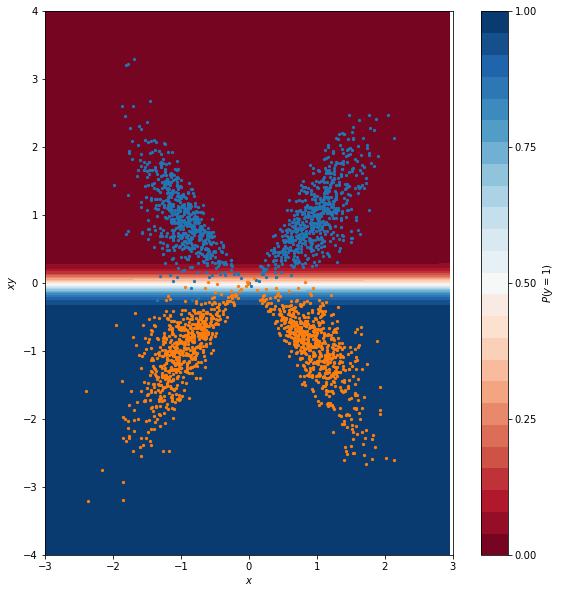

In [271]:
f, ax = plt.subplots(figsize=(10,10))
contour = ax.contourf(xx, zz, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test_feateng['x'].where(y_test_feateng['class']==0), X_test_feateng['xy'].where(y_test_feateng['class']==0), s=5, cmap="RdBu", vmin=-.2, vmax=1.2, linewidth=1)
ax.scatter(X_test_feateng['x'].where(y_test_feateng['class']==1), X_test_feateng['xy'].where(y_test_feateng['class']==1), s=5, cmap="RdBu", vmin=-.2, vmax=1.2, linewidth=1)

ax.set(aspect="equal", xlim=(-3, 3), ylim=(-4, 4), xlabel="$x$", ylabel="$xy$")